In [1]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

import konlpy
okt = konlpy.tag.Okt()

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['figure.figsize'] = 10,10
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [2]:
news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

## 언론사 확인

In [4]:
press = bkp.press_counter(news_df)

<AxesSubplot: xlabel='기사', ylabel='언론사'>

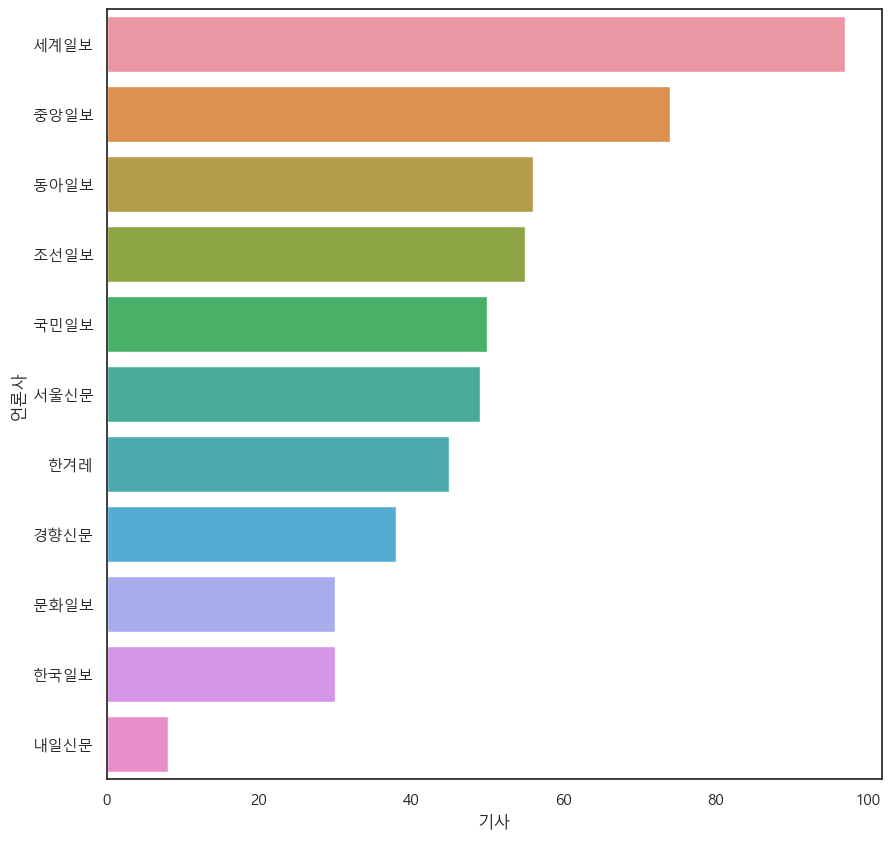

In [5]:
sns.barplot(data = press, x = "기사", y = "언론사")

## 키워드 빈도

In [6]:
lis = bkp.keywords_list(news_df["키워드"])

In [7]:
key = bkp.keyword_parser(lis)

In [8]:
key = bkp.duplication_remover(key)

In [9]:
key_words = bkp.word_counter(key)
key_words = bkp.counter_to_DataFrame(key_words)

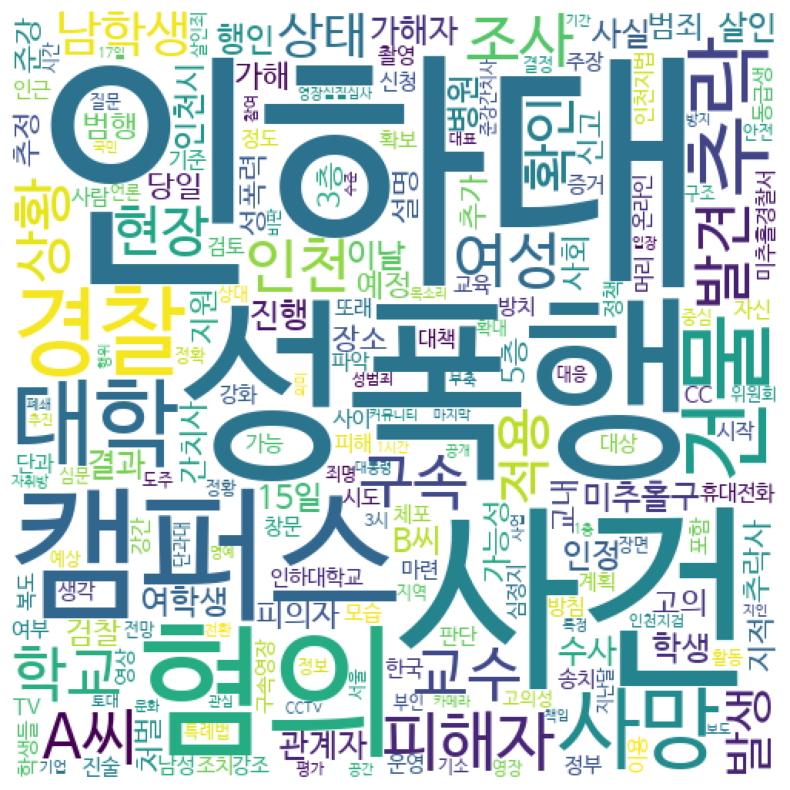

In [10]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(key_words.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 언론사 별 단어 빈도 분석

In [11]:
news_df['언론사'].unique()

array(['조선일보', '국민일보', '중앙일보', '한겨레', '서울신문', '내일신문', '경향신문', '문화일보',
       '동아일보', '세계일보', '한국일보'], dtype=object)

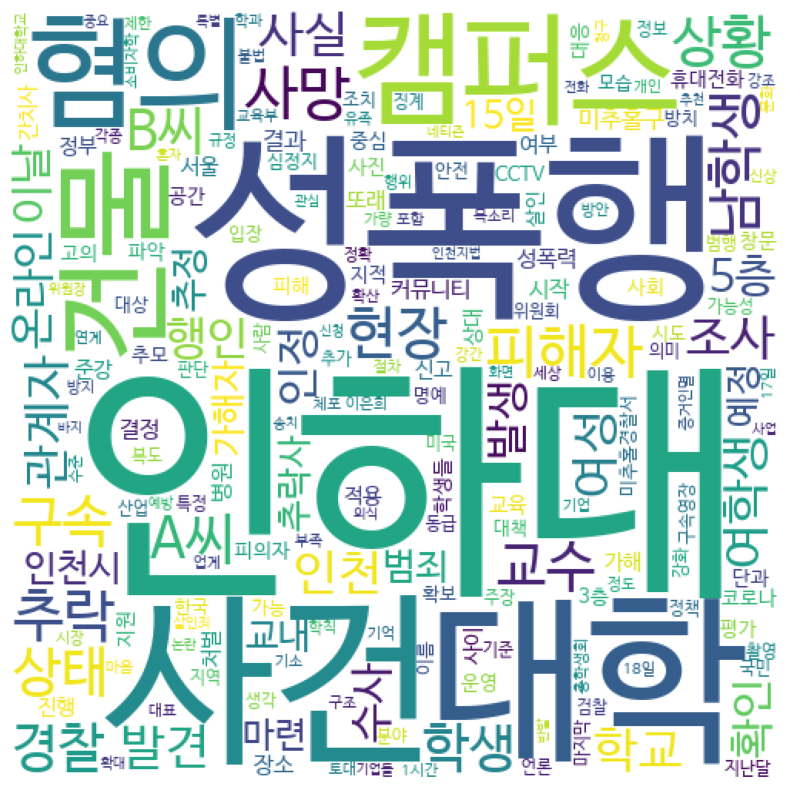

In [12]:
bkp.press_keywords_wordcloud(news_df, '조선일보')

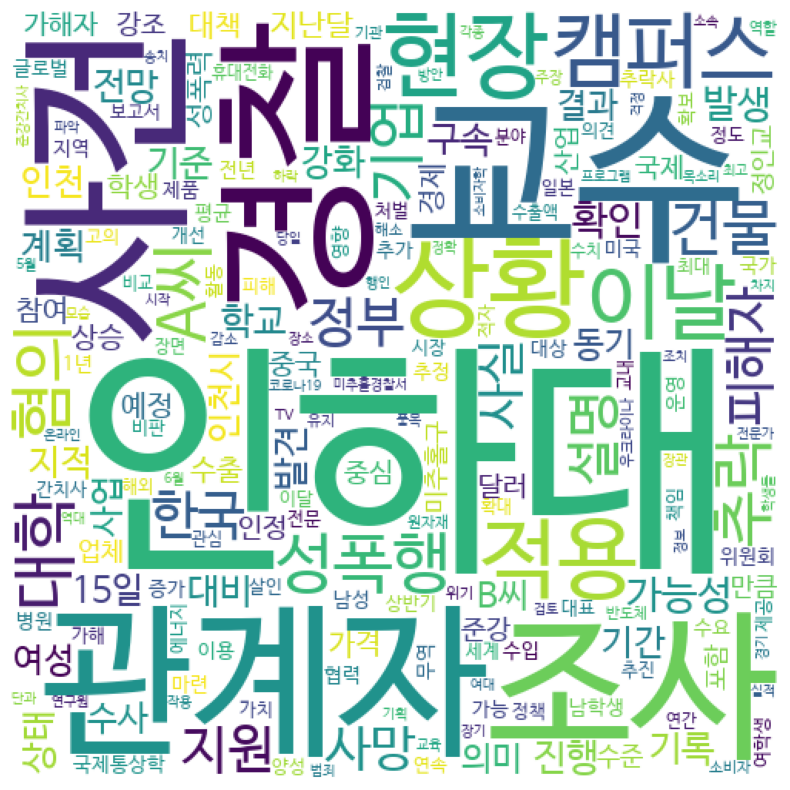

In [13]:
bkp.press_keywords_wordcloud(news_df, '중앙일보')

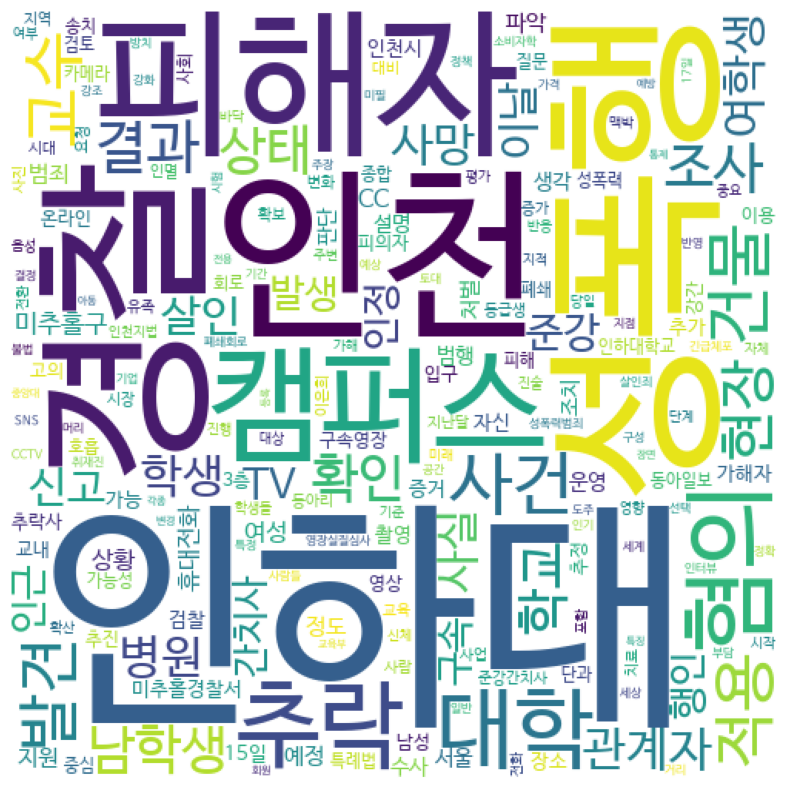

In [14]:
bkp.press_keywords_wordcloud(news_df, '동아일보')

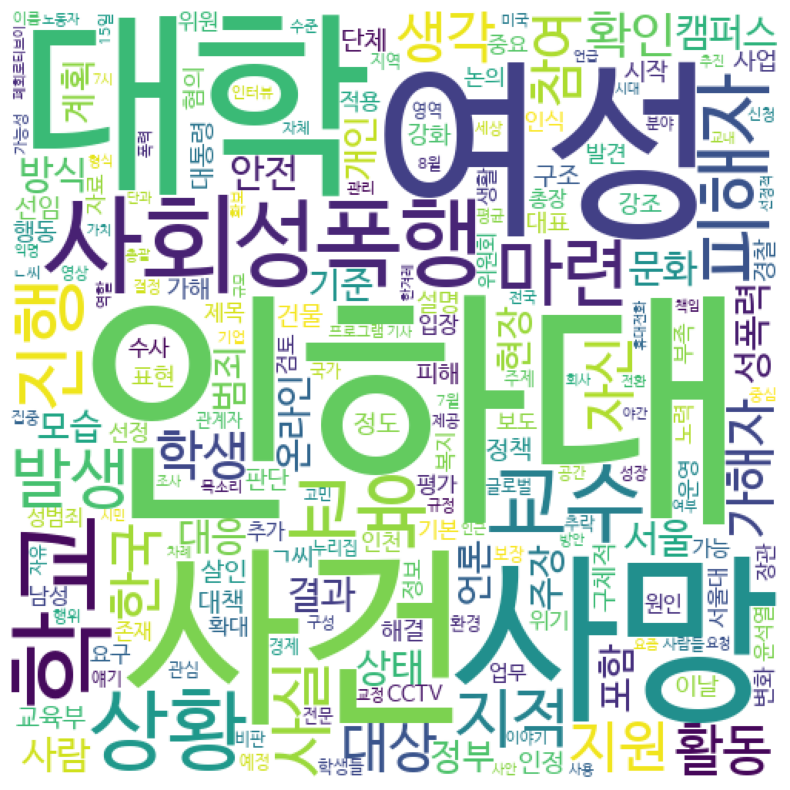

In [15]:
bkp.press_keywords_wordcloud(news_df, '한겨레')

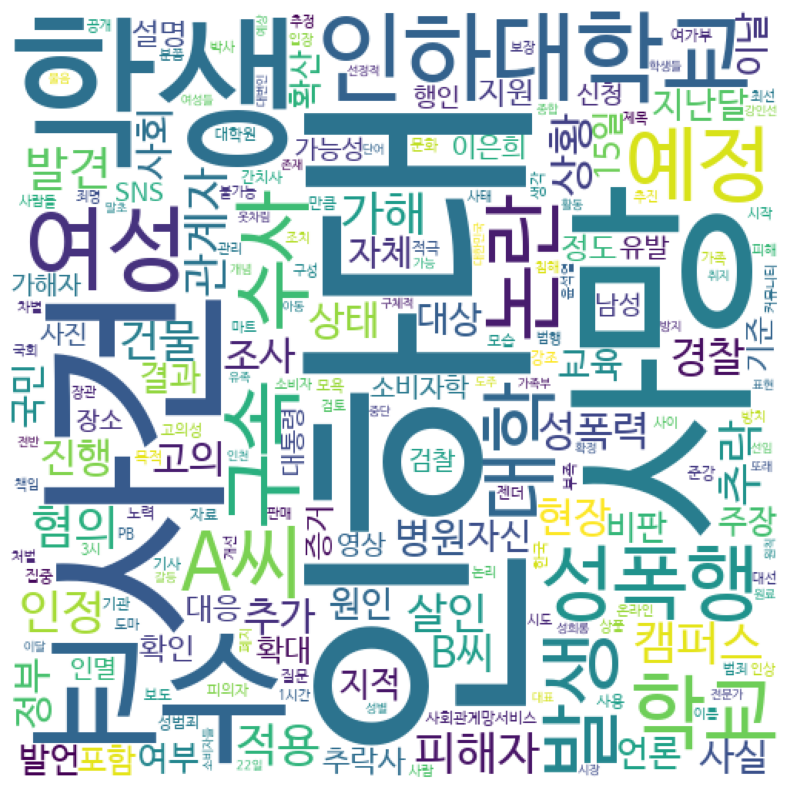

In [17]:
bkp.press_keywords_wordcloud(news_df, '경향신문')

## 제목 단어 빈도 분석

In [18]:
title = bkp.keywords_list(news_df['제목'])

In [19]:
words = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    words.append(word)

In [20]:
news_titles = bkp.word_counter(words)
news_titles = bkp.counter_to_DataFrame(news_titles)

In [21]:
news_titles= news_titles[news_titles["단어"].str.len() >=2].reset_index(drop = True)

In [22]:
news_titles = news_titles.head(20)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

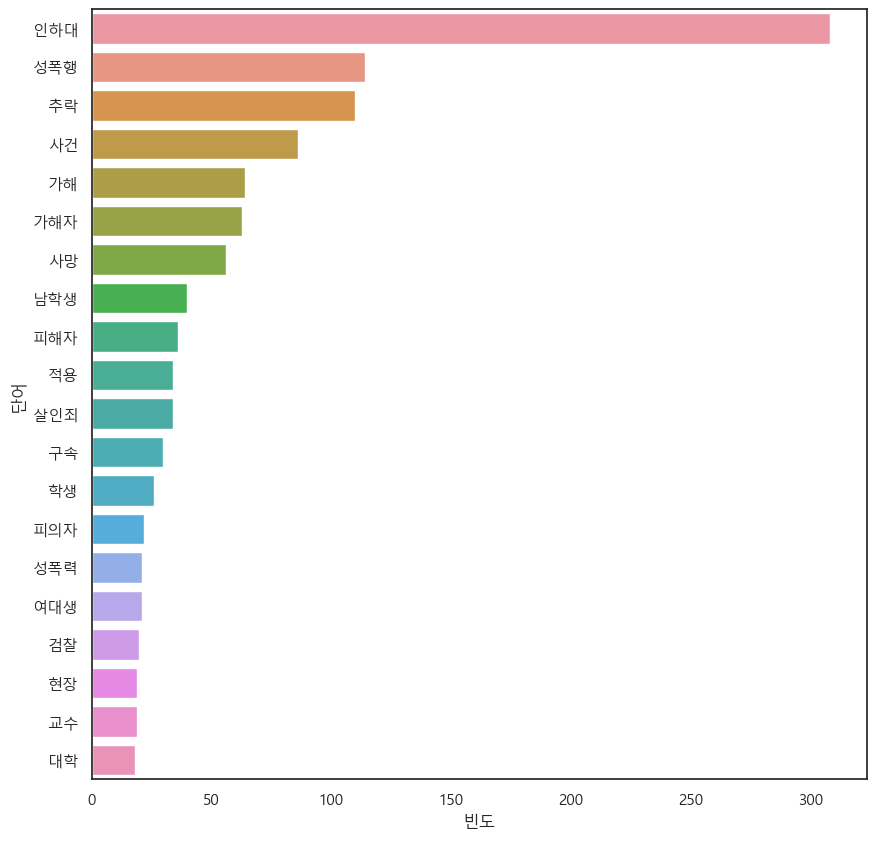

In [23]:
sns.barplot(data = news_titles, x = '빈도', y = '단어')

## 키워드 분석 with Bigram

In [24]:
from nltk import bigrams

In [25]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '성폭행':
            wor.append(t[1])
        elif t[1] == '성폭행':
            wor.append(t[0])

In [26]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [27]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

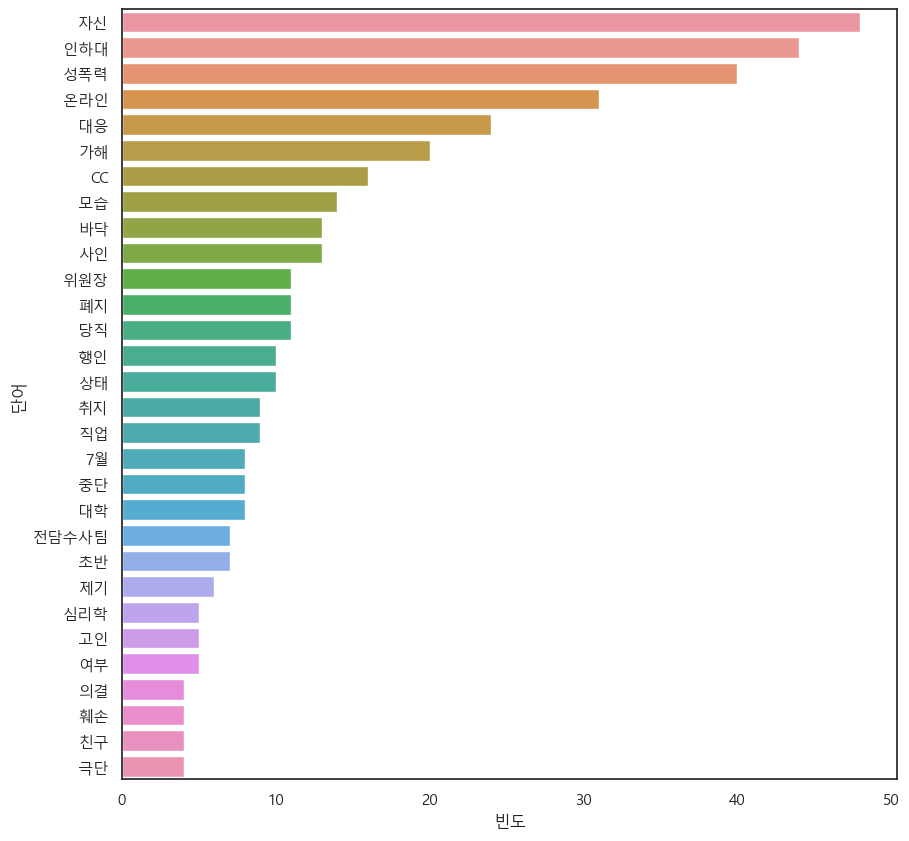

In [28]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

In [29]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '여대생':
            wor.append(t[1])
        elif t[1] == '여대생':
            wor.append(t[0])

In [30]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [31]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

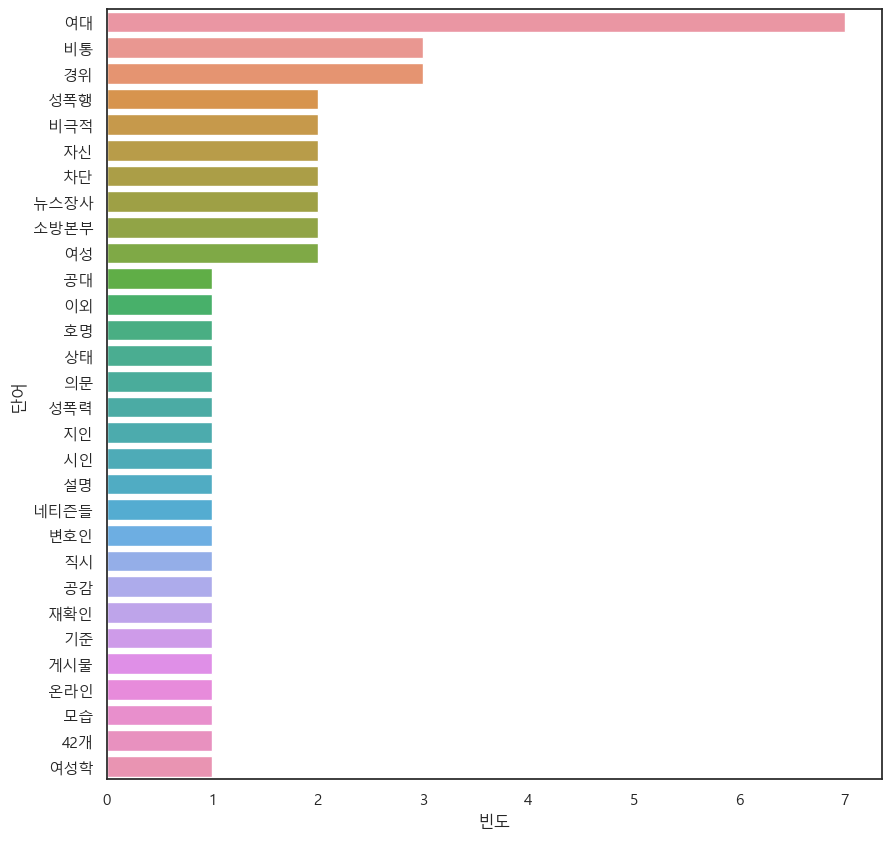

In [32]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

## 제목 분석 with Bigram

In [33]:
title = bkp.keywords_list(news_df['제목'])

In [34]:
bot = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    bot.append(word)

In [35]:
wors = []

for sentence in bot:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '인하대':
            wors.append(t[1])
        elif t[1] == '인하대':
            wors.append(t[0])

In [36]:
counter = {}

for word in wors:
    if not word in counter:
        counter[word] = 1
    if word in counter:
        counter[word] +=1
        
title_df = bkp.counter_to_DataFrame(counter)
title_df = title_df[title_df['단어'].str.len() >= 2].reset_index(drop = True).head(30)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

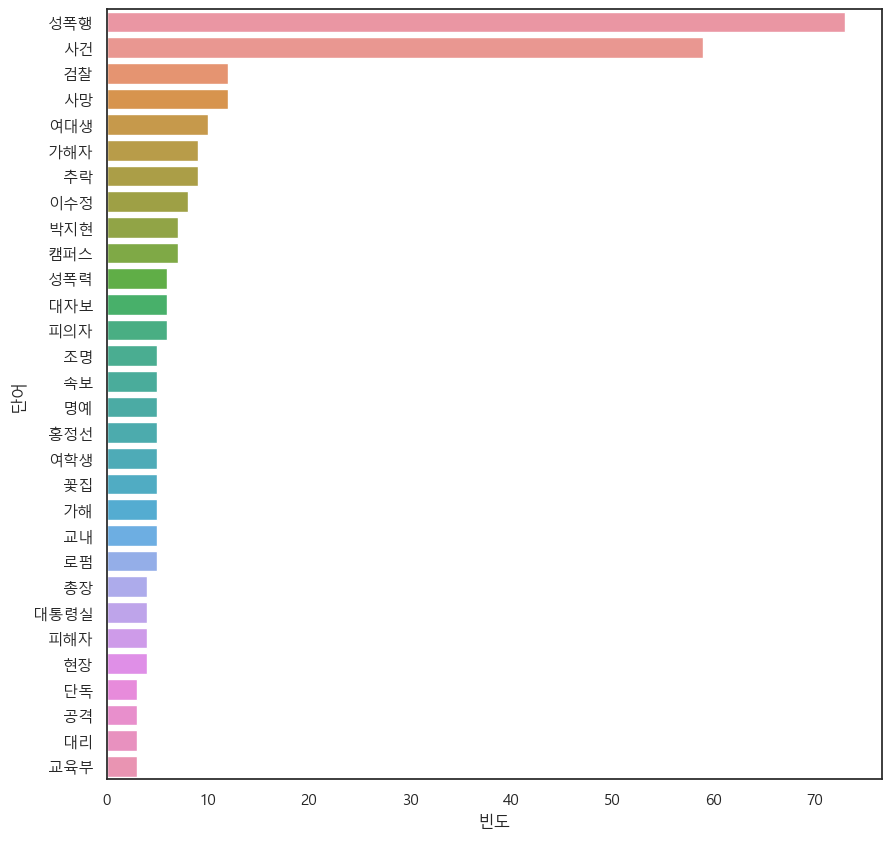

In [37]:
sns.barplot(data = title_df, x = '빈도', y = '단어')

## 특정 단어 사용 고빈도 언론사 추출

In [38]:
news_df[news_df['제목'].str.contains('여대생')].groupby('언론사').size()

언론사
동아일보    1
문화일보    1
서울신문    4
세계일보    6
조선일보    2
중앙일보    7
dtype: int64

In [39]:
news_df[news_df['본문'].str.contains('여대생')].groupby('언론사').size()

언론사
국민일보     1
동아일보     3
문화일보     3
서울신문     3
세계일보    13
조선일보     2
중앙일보     4
dtype: int64

In [40]:
news_df[news_df['제목'].str.contains('강간')].groupby('언론사').size()

언론사
국민일보    3
동아일보    1
서울신문    3
세계일보    1
조선일보    3
중앙일보    1
한겨레     1
dtype: int64

## t-SNE

In [41]:
text = news_df['키워드']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).toarray()

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(vec)

tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


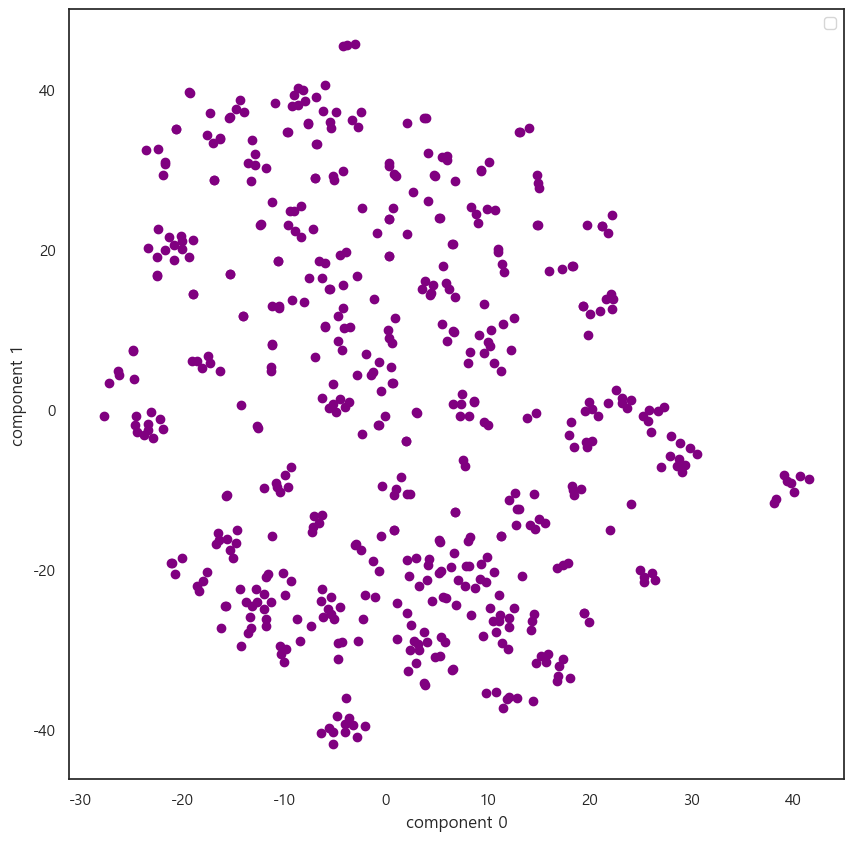

In [44]:
plt.scatter(tsne_df['component 0'], tsne_df['component 1'], color = 'purple')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

문서 간 밀접 여부 파악이 어려움

Clustering의 정확도가 낮을 것으로 예상

# Topic Modeling

In [45]:
news_words = bkp.keyword_parser(news_df['키워드'])

In [46]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [49]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict, passes=20, iterations=100)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

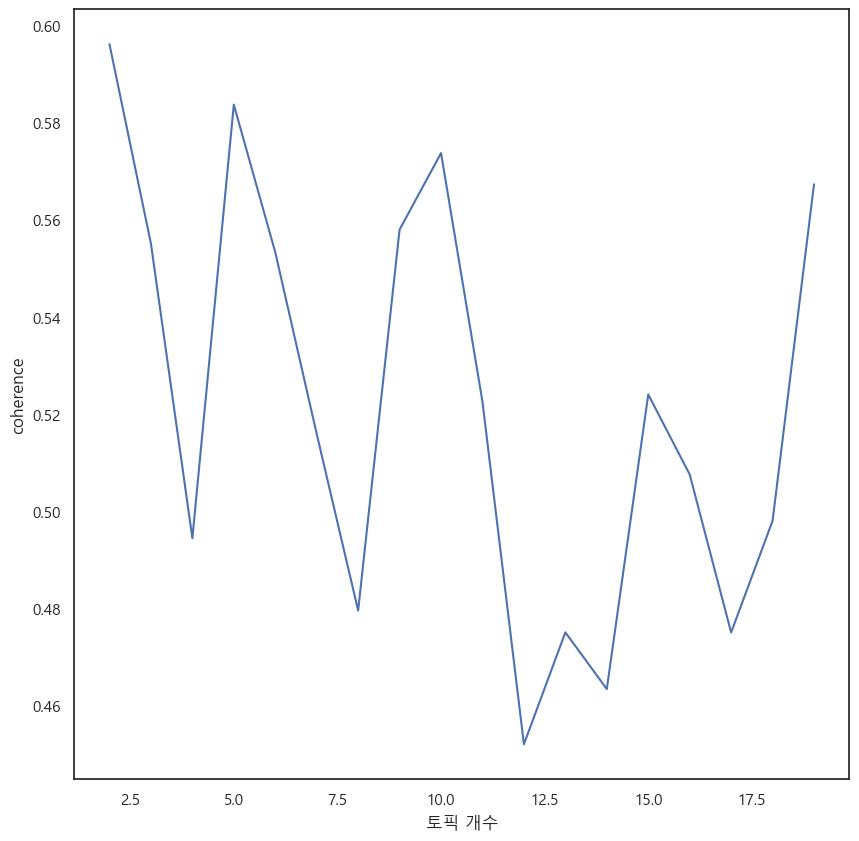

In [50]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

최적 Topic 갯수는 1개로 나타남

다만, 분석 시도를 위해 2번째로 높은 토픽인 3개로 LDA 진행

In [51]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=20, iterations=100, random_state=100)
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.022*"인하대" + 0.020*"A씨" + 0.016*"사건" + 0.015*"경찰" + 0.015*"혐의" + 0.015*"피해자" + 0.015*"B씨" + 0.013*"추락"')
(1, '0.008*"정부" + 0.007*"가격" + 0.006*"중국" + 0.005*"수출" + 0.005*"교수" + 0.004*"적자" + 0.004*"달러" + 0.004*"무역"')
(2, '0.006*"전형" + 0.006*"지원" + 0.005*"인하대" + 0.005*"대학" + 0.005*"평가" + 0.004*"총장" + 0.004*"장관" + 0.004*"선발"')


In [52]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


1번 Topic : 사건 보도 관련 기사, 주로 단신 내지 스트레이트 기사의 확률이 높음

2번 Topic : 본 사건과 관련이 크지 않은 기사

3번 Topic : 본 사건과 정치와 연결되는 기사들, 여가부, 대통령, 장관 등 정치적 Agenda를 표방하는 기사의 확률이 높음

In [53]:
pyLDAvis.save_html(vis, 'inha_LDA.html') #LDAvis save

In [54]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [55]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [56]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

,뉴스 번호,주요 토픽,주요 토픽 비중,토픽 별 비중
0,0,1,0.7029,"[(1, 0.7028822), (2, 0.29433104)]"
1,1,1,0.8159,"[(1, 0.8158756), (2, 0.1818601)]"
2,2,1,0.9977,"[(1, 0.99773484)]"
3,3,2,0.9971,"[(2, 0.9970873)]"
4,4,1,0.9960,"[(1, 0.9959681)]"
5,5,2,0.7645,"[(1, 0.23445328), (2, 0.7645293)]"
6,6,1,0.9970,"[(1, 0.9969569)]"
7,7,1,0.9941,"[(1, 0.99413085)]"
8,8,2,0.9949,"[(2, 0.99490756)]"
9,9,2,0.9954,"[(2, 0.9954118)]"


In [60]:
news_topic_df = pd.concat([news_df[['제목', '언론사', '키워드']],topictable['주요 토픽']], axis = 1)

In [61]:
news_topic_df[news_topic_df['주요 토픽'] == 0].head(30) #인하대 사건 관련 기사가 다수

,제목,언론사,키워드,주요 토픽
10,인하대 ‘성폭행 강간치사’ 가해 남학생 퇴학 의결,세계일보,"강간치사,인하대,성폭행,강간,치사,의결,남학생,퇴학,인하대,캠퍼스,동급생,성폭행,건...",0.0
12,‘인하대 성폭행 추락사’ 가해 남학생 퇴학 처분 의결,문화일보,"추락사,인하대,성폭행,남학생,퇴학,처분,의결,인하대,캠퍼스,또래,여학생,성폭행,혐의...",0.0
13,‘인하대 성폭행 추락사’ 가해 학생 퇴학 처분 의결,경향신문,"추락사,인하대,성폭행,학생,퇴학,처분,의결,인하대학교,캠퍼스,발생,사건,성폭행,사망...",0.0
14,‘성폭행 추락사’ 인하대생 퇴학 의결 다시 주목받는 그 목소리,동아일보,"성폭행,추락사,의결,인하대,퇴학,주목,목소리,인하대학교,캠퍼스,여대생,성폭행,살해,...",0.0
15,인하대 성폭행 사망 가해자 ‘퇴학’ 의결 총장 결정만 남았다,한겨레,"퇴학,인하대,성폭행,사망,가해자,의결,총장,결정,사망사건,인하대,성폭행,사망,사건,...",0.0
17,'인하대 성폭행 추락사' 첫 재판 비공개로 전환,세계일보,"추락사,인하대,성폭행,재판,전환,인하대학교,성폭행,사망,사건,가해,남학생,재판,비공...",0.0
18,"인하대, ‘성폭행 추락사’ 가해 학생 퇴학 처분 의결",서울신문,"인하대,성폭행,추락사,학생,퇴학,처분,의결,인하대,캠퍼스,여학생,성폭행,건물,추락,...",0.0
19,"인하대, 성폭행 가해 학생 '퇴학' 처분 의결",한국일보,"인하대,성폭행,가해,학생,퇴학,처분,의결,확정,퇴학,처분,확정,불가,인하대,캠퍼스,...",0.0
20,‘인하대 성폭행 추락사’ 재판 비공개로 유족 의견 반영,중앙일보,"추락사,인하대,성폭행,재판,유족,의견,반영,인하대,캠퍼스,또래,여학생,성폭행,건물,...",0.0
21,인하대 사망사건 피의자 첫 재판 비공개로 진행,국민일보,"피의자,인하대,사망,사건,재판,비공개,진행,피해자,재판부,공판,절차,요청,인하대,캠...",0.0


In [62]:
news_topic_df[news_topic_df['주요 토픽'] == 1].head(20) 

,제목,언론사,키워드,주요 토픽
0,“자산운용 전문인력 양성” 인하대⋅한화저축은행 업무 협약,조선일보,"양성,자산,운용,전문,인력,인하대,한화저축은행,업무,협약,인하대,한화저축은행,양성,...",1.0
1,"인하대 한화저축은행, 자산운용 인력 양성 위해 맞손",국민일보,"인하대,한화저축은행,양성,자산,운용,인력,맞손,인하대학교,이사장실,본관,한화저축은행...",1.0
2,"흔들리는 '10월 물가 정점론' 농산물, 라면 과자에 환율까지 출렁",중앙일보,"정점론,물가,정점,농산물,과자,환율,출렁,정부,그간,강조,정점론,물가,정점,예년,추...",1.0
4,"울산, 동남권 미세먼지 연구 관리 ‘선도’",서울신문,"울산,동남,미세,먼지,관리,선도,UNIST,동남,미세,먼지,관리센터,유치,2025년...",1.0
6,"“상추 추가, 네? 1500원요?” 길어지는 인플레에 ‘공짜’가 사라진다",조선일보,"상추,추가,1500원,인플레,공짜,WEEKLY,BIZ,Biz,Pick,직장인,지난달...",1.0
7,"울산시 유니스트, 동남권 미세먼지 연구 관리 선도",경향신문,"울산시,유니스트,동남,미세,먼지,관리,선도,울산시,유니스트,울산과학기술원,협력,동남...",1.0
16,9월 무역수지도 에너지發 충격 연간 적자 275억달러 넘겨,중앙일보,"무역,수지,에너지,충격,연간,적자,달러,9월,에너지,수입발,무역,수지,경고등,25년...",1.0
31,17만명 감동케한 이 손글씨 작가는 폐지 줍던 어르신이었다,중앙일보,"17만,감동,손글씨,작가,폐지,어르신,세상,해님,마음,김자옥,77,가명,생애,정규직...",1.0
35,"“성소수자 진료, 몰라서 차별하면 안되잖아요 국내 최초 ‘성소수자 의료가이드’",경향신문,"성소수자,진료,차별,성소수자,의료,시작,서울의대,성소수자,의료,강의,의대,대상,확대...",1.0
36,"김밥 한줄 3000원 시대 개막 외식물가, 30년만 최고 상승률",중앙일보,"김밥,외식물가,30년,최고,상승,김밥,김밥,시대,1000원,대표적,서민,메뉴,김밥,...",1.0


In [63]:
news_topic_df[news_topic_df['주요 토픽'] == 2].head(20) 

,제목,언론사,키워드,주요 토픽
3,정원감축 ‘당근’ 외면한 주요대 줄어드는 인원 88% 비수도권,한겨레,"정원,감축,당근,외면,주요대,비수도권,인원,88%,비수,도권,96곳,전국,대학,학령...",2.0
5,"""부자감세+재정건전성 강화 → 양극화 촉발""",내일신문,"부자감세,재정건전성,강화,양극,촉발,정부,세제개편안,평가,부자감세,재정,건전,강화,...",2.0
8,"인천시, 미래 교통수단 파브(PAV) 조기 상용화 나서",문화일보,"인천시,파브,미래,교통수단,PAV,조기,상용,5년,투입,평가,핵심,부품,시험,복합,...",2.0
9,"인천시, 미래 항공교통산업 거점으로 도약",동아일보,"인천시,거점,미래,항공,교통,산업,도약,종합테스트,베드,구축,공모,선정,구성,산학연...",2.0
11,우회 추진 논란 ‘지방시대위원회’ 강행,세계일보,"우회,추진,논란,지방,시대,위원회,강행,윤석열정부,지방시대위원회,출범,특별법,입법,...",2.0
28,"인천시, 개인용비행체(PAV) 조기 상용화 박차",국민일보,"인천시,개인용,비행체,PAV,박차,조기,상용,인천,개인용,비행체,PAV,산업,요람,...",2.0
29,"인천시, 개인용 비행체 사업 요람으로 부상 180억대 국책 과제에 선정",조선일보,"인천시,개인,비행체,사업,요람,부상,180억,국책,선정,인천시,미래,Wingless...",2.0
32,가상 인간이 일자리 빼앗는다? 즐거운 만큼 갈등도 커진다,한국일보,"가상,인간,일자리,만큼,갈등,가상,인간,발전,사회,부작용,증가일자리,갈등,윤리,법적...",2.0
33,"‘손흥민 꿈’ 머리로만 꾼다 초등 1~2학년, 체육교과 없어",한겨레,"손흥민,머리,초등,학년,체육교과,교육부,초등학생,1위,직업,선호도,운동선수,3년,추...",2.0
39,고물가에 중고마켓서 추석선물 사는 2030,동아일보,"고물가,중고마켓,추석선물,선물,명절테크,유행,시세,40%가량,가격,거래,상품,쇼핑백...",2.0


LDA의 주제 분류가 다소 깔끔하지 않음을 보임

다른 모델을 사용해볼 필요가 있음

# K-means Clustering

In [65]:
from sklearn.preprocessing import Normalizer

nor = Normalizer()
norvec = nor.fit_transform(vec)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


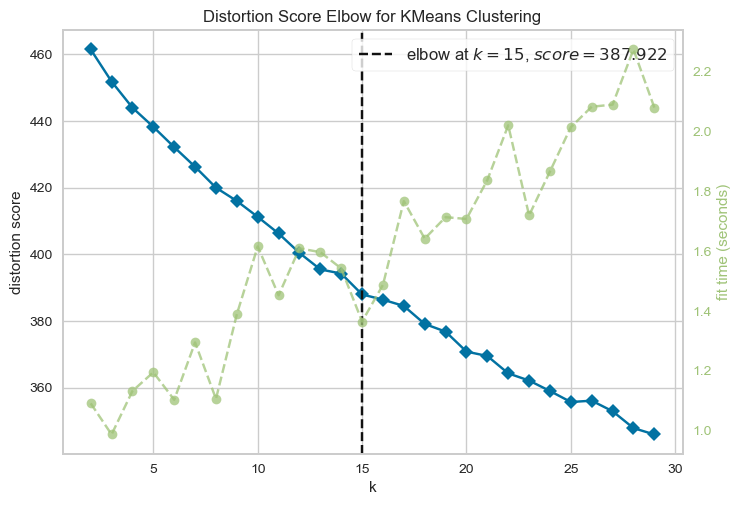

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

vzr = KElbowVisualizer(KMeans(), k=(2, 30))
vzr.fit(norvec)
vzr.poof()

In [97]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans= KMeans(n_clusters=15, max_iter=1000, random_state=0) #최적 Topic 개수 15개를 기점으로 진행
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

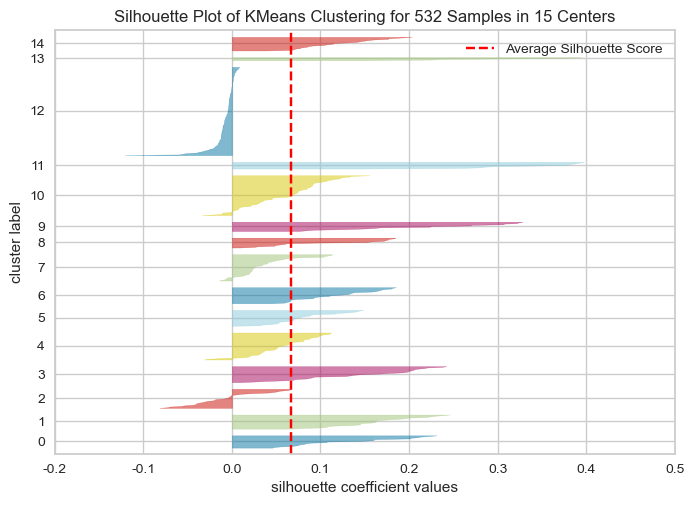

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 532 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [98]:
visualizer.fit(norvec)
visualizer.show()

In [127]:
topic_df = news_df[['언론사', '제목', '키워드']]

In [128]:
kmeans.fit(norvec)

labels = kmeans.labels_

topic_df['군집'] = labels

In [129]:
topic_df.groupby('군집').size()

군집
0      21
1      24
2      32
3      27
4      45
5      27
6      27
7      44
8      17
9      16
10     66
11     12
12    145
13      6
14     23
dtype: int64

In [130]:
topic_df.loc[topic_df['군집']==0, '군집'] = '부고'
topic_df.loc[topic_df['군집']==1, '군집'] = '방치 단어 포함 기사'
topic_df.loc[topic_df['군집']==2, '군집'] = '사고 직후 이슈들'
topic_df.loc[topic_df['군집']==3, '군집'] = '학교 측 가해자 징계'
topic_df.loc[topic_df['군집']==4, '군집'] = '가해자 진술'
topic_df.loc[topic_df['군집']==5, '군집'] = '사후 대책'
topic_df.loc[topic_df['군집']==6, '군집'] = '관련 없는 기사'
topic_df.loc[topic_df['군집']==7, '군집'] = '여성가족부 관련 보도'
topic_df.loc[topic_df['군집']==8, '군집'] = '인하대 총장 관련 이슈'
topic_df.loc[topic_df['군집']==9, '군집'] = '인하대 입시 관련 보도'
topic_df.loc[topic_df['군집']==10, '군집'] = '가해자 처벌 관련 보도'
topic_df.loc[topic_df['군집']==11, '군집'] = '리멤버 0715'
topic_df.loc[topic_df['군집']==12, '군집'] = '관련 없는 기사'
topic_df.loc[topic_df['군집']==13, '군집'] = '최초 보도'
topic_df.loc[topic_df['군집']==14, '군집'] = '사건 초기 조사 보도'

In [132]:
topic_df.to_excel('./inha_topic.xlsx')